In [1]:
import pandas as pd
import numpy as np

file_name='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'

df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv', header=0)

df = df.fillna(0)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df1= df.drop(['X', 'Y','OBJECTID','INCKEY','COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC',
'COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT', 'INCDATE','INCDTTM', 'JUNCTIONTYPE','SDOT_COLCODE', 'SDOT_COLDESC',
'INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 
'SEVERITYCODE.1'], axis=1)

In [3]:
df1.head()


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Overcast,Wet,Daylight,0
1,1,Raining,Wet,Dark - Street Lights On,0
2,1,Overcast,Dry,Daylight,0
3,1,Clear,Dry,Daylight,0
4,2,Raining,Wet,Daylight,0


In [4]:

cleanup_nums = {"WEATHER":     {"Clear": 1, "Raining": 2, "Overcast": 3, "Unknown": 4, "Snowing": 5, "Other": 6, "Fog/Smog/Smoke": 7,
                               "Sleet/Hail/Freezing Rain": 8, "Blowing Sand/Dirt": 9, "Severe Crosswind": 10,"Partly Cloudy": 11},
                "ROADCOND":    {"Dry": 1, "Wet": 2, "Unknown": 3, "Ice": 4,
                                  "Snow/Slush": 5, "Other": 6, "Standing Water": 7, "Sand/Mud/Dirt": 8,"Oil": 9},
               "LIGHTCOND":     {"Daylight": 1, "Dark - Street Lights On": 2, "Unknown": 3, "Dusk": 4, "Dawn": 5, "Dark - No Street Lights": 6, "Dark - Street Lights Off": 7,
                                 "Other": 8, "Dark - Unknown Lighting": 9},
               "SPEEDING":  {"Y": 1, }}

In [5]:

df1.replace(cleanup_nums, inplace= True)
df1.head()


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,3,2,1,0
1,1,2,2,2,0
2,1,3,1,1,0
3,1,1,1,1,0
4,2,2,2,1,0


In [6]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

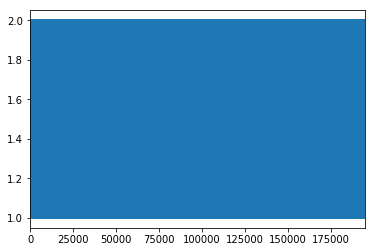

In [7]:
df1["SEVERITYCODE"].plot()

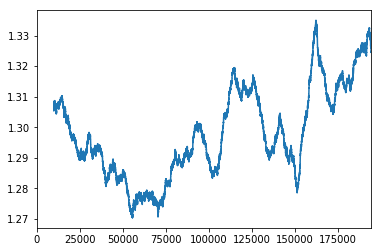

In [8]:
df1["SEVERITYCODE"].rolling(10000).mean().plot()

In [9]:
df1.index

RangeIndex(start=0, stop=194673, step=1)

In [10]:
df1.set_index("SEVERITYCODE", inplace=  True)

In [11]:
df1.head()

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
SEVERITYCODE,,,,
2,3,2,1,0
1,2,2,2,0
1,3,1,1,0
1,1,1,1,0
2,2,2,1,0


In [12]:
df1.index

Int64Index([2, 1, 1, 1, 2, 1, 1, 2, 1, 2,
            ...
            2, 1, 1, 2, 1, 2, 1, 2, 2, 1],
           dtype='int64', name='SEVERITYCODE', length=194673)

In [13]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

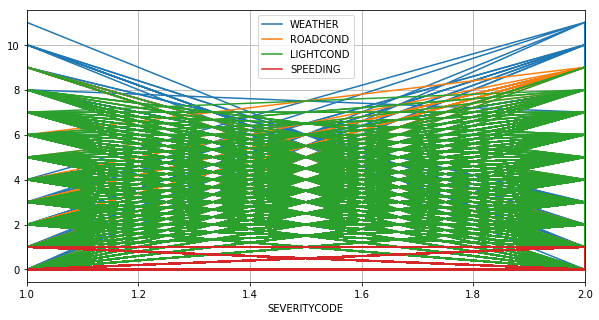

In [14]:
df2=df1.plot(figsize=(10,5), grid=True)


In [15]:
import pandas as pd



df = pd.DataFrame({'SEVERITYCODE': range(100), 'WEATHER': [2*i for i in range(100)]})


In [16]:
df['SEVERITYCODE'].corr(df['WEATHER'])

0.9999999999999999

In [17]:
df.loc[2, 'WEATHER'] = 4.5


In [18]:
df['SEVERITYCODE'].corr(df['WEATHER'])

0.9999996387652679

In [19]:
df.corr()

,SEVERITYCODE,WEATHER
SEVERITYCODE,1.0,1.0
WEATHER,1.0,1.0


In [22]:
df = pd.DataFrame({'SEVERITYCODE': range(100), 'SPEEDING': [2*i for i in range(100)]})

In [24]:
df['SEVERITYCODE'].corr(df['SPEEDING'])

0.9999999999999999

In [25]:
df.loc[2, 'SPEEDING'] = 4.5


In [26]:
df['SEVERITYCODE'].corr(df['SPEEDING'])

0.9999996387652679

In [27]:
df.corr()

,SEVERITYCODE,SPEEDING
SEVERITYCODE,1.0,1.0
SPEEDING,1.0,1.0
